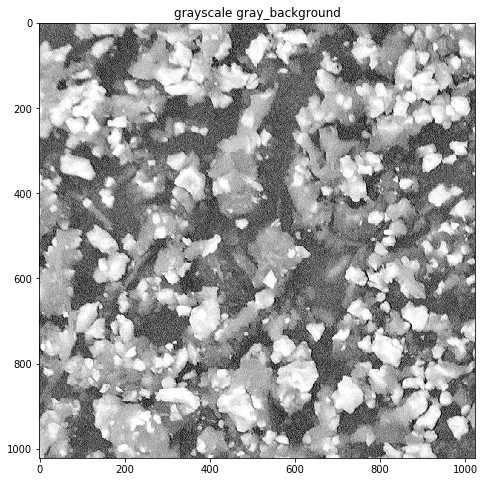

In [38]:
from skimage import color
import Dataset
from Utils import visualize
import cv2

dataset_list = Dataset.get_full_dataset()
INDEX = 8
data = dataset_list[INDEX]
image, title = data['image'], data['title']

image = cv2.imread('../data/003_p.png')
    
visualize(image, f'grayscale {title}')

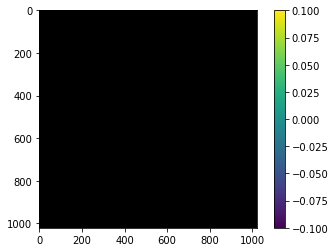

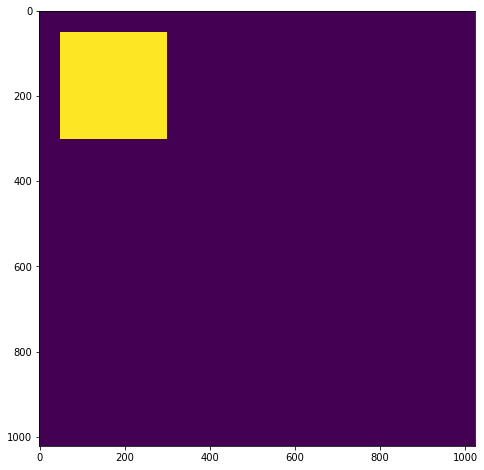

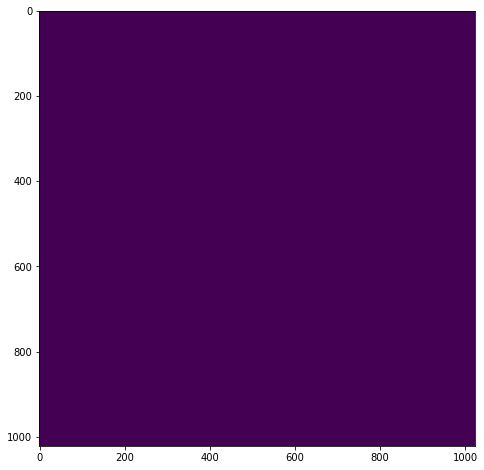

In [39]:

from matplotlib import pyplot as plt
import numpy as np

mask = np.zeros(image.shape[:2], np.uint8)
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

cv2.grabCut(image, mask, (50,50,250,250), bgdModel, fgdModel, 1,cv2.GC_INIT_WITH_RECT)

mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
image = image * mask2[:, :, np.newaxis]

plt.imshow(image)
plt.colorbar()
plt.show()

visualize(mask)
visualize(mask2)